In [19]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from matplotlib import rc
from datetime import datetime
import missingno as msno

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú
warnings.filterwarnings('ignore')

# ÏãúÎìú ÏÑ§Ï†ï
np.random.seed(42)

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!")


ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!


In [20]:
# 2021-2023ÎÖÑ ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ï§ë...")
train2021 = pd.read_csv('Îç∞Ïù¥ÌÑ∞2/train_subway2021.csv')
train2022 = pd.read_csv('Îç∞Ïù¥ÌÑ∞2/train_subway2022.csv')
train2023 = pd.read_csv('Îç∞Ïù¥ÌÑ∞2/train_subway2023.csv')

print(f"2021ÎÖÑ Îç∞Ïù¥ÌÑ∞: {train2021.shape}")
print(f"2022ÎÖÑ Îç∞Ïù¥ÌÑ∞: {train2022.shape}")
print(f"2023ÎÖÑ Îç∞Ïù¥ÌÑ∞: {train2023.shape}")

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df = pd.concat([train2021, train2022, train2023], ignore_index=True)
print(f"\nÎ≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞: {df.shape}")

# Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
del train2021, train2022, train2023

print("\nÎç∞Ïù¥ÌÑ∞ Î≥ëÌï© ÏôÑÎ£å!")


Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ï§ë...
2021ÎÖÑ Îç∞Ïù¥ÌÑ∞: (5452143, 15)
2022ÎÖÑ Îç∞Ïù¥ÌÑ∞: (5396200, 15)
2023ÎÖÑ Îç∞Ïù¥ÌÑ∞: (5520981, 15)

Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞: (16369324, 15)

Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© ÏôÑÎ£å!


In [21]:
# Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(df.info())
print("\n=== Ï≤òÏùå 5Ìñâ ===")
print(df.head())
print("\n=== Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ===")
print(df.describe())


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ÏãúÍ∞Ñ        int64  
 1   Ìò∏ÏÑ†        int64  
 2   Ïó≠Î≤àÌò∏       int64  
 3   Ïó≠Î™Ö        object 
 4   ÏÉÅÌïòÍµ¨Î∂Ñ      object 
 5   AWS_ÏßÄÏ†êÏΩîÎìú  int64  
 6   Í∏∞Ïò®        float64
 7   ÌíçÌñ•        float64
 8   ÌíçÏÜç        float64
 9   ÏùºÍ∞ïÏàòÎüâ      float64
 10  ÏãúÍ∞ÑÍ∞ïÏàòÎüâ     float64
 11  ÏÉÅÎåÄÏäµÎèÑ      float64
 12  ÏùºÏÇ¨Îüâ       float64
 13  Ï≤¥Í∞êÏò®ÎèÑ      float64
 14  ÌòºÏû°ÎèÑ       int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB
None

=== Ï≤òÏùå 5Ìñâ ===
           ÏãúÍ∞Ñ  Ìò∏ÏÑ†  Ïó≠Î≤àÌò∏   Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ  AWS_ÏßÄÏ†êÏΩîÎìú   Í∏∞Ïò®     ÌíçÌñ•   ÌíçÏÜç  ÏùºÍ∞ïÏàòÎüâ  ÏãúÍ∞ÑÍ∞ïÏàòÎüâ  \
0  2021010100   1  150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.6  291.1  3.3   0.0    0.0   
1  2021010101   1  150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.

In [22]:
#1. ÏãúÍ∞Ñ ÌòïÏãù ÏßÄÏ†ï 
# 2. ÏöîÏùº Ï†ïÎ≥¥ Ï∂îÏ∂ú (Ïà´Ïûê + Î¨∏Ïûê)
# 3. Í≥µÌú¥Ïùº Ïó¨Î∂Ä Ï∂îÍ∞Ä
# 4. ÏãúÍ∞Ñ Í¥ÄÎ†® ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
# 5. -99Î•º Í≤∞Ï∏°ÏπòÎ°ú Î≥ÄÌôò

# ÏãúÍ∞Ñ Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨
df['ÏãúÍ∞Ñ'] = pd.to_datetime(df['ÏãúÍ∞Ñ'].astype(str), format='%Y%m%d%H')

# ÏöîÏùº Î∞è Í≥µÌú¥Ïùº Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df['ÏöîÏùºÏà´Ïûê'] = df['ÏãúÍ∞Ñ'].dt.weekday
weekday_map = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']
df['ÏöîÏùºÎ¨∏Ïûê'] = df['ÏöîÏùºÏà´Ïûê'].apply(lambda x: weekday_map[x])

# ÌïúÍµ≠ Í≥µÌú¥Ïùº ÌôïÏù∏
years = df['ÏãúÍ∞Ñ'].dt.year.unique()
kr_holidays = holidays.KR(years=years)
df['Í≥µÌú¥ÏùºÏó¨Î∂Ä'] = df['ÏãúÍ∞Ñ'].dt.date.apply(lambda x: 1 if x in kr_holidays else 0)

# ÏãúÍ∞Ñ Í¥ÄÎ†® ÌîºÏ≤ò Ï∂îÍ∞Ä
df['ÎÖÑÎèÑ'] = df['ÏãúÍ∞Ñ'].dt.year
df['Ïõî'] = df['ÏãúÍ∞Ñ'].dt.month
df['Ïùº'] = df['ÏãúÍ∞Ñ'].dt.day
df['Ïãú'] = df['ÏãúÍ∞Ñ'].dt.hour

# -99Î•º Í≤∞Ï∏°ÏπòÎ°ú Î≥ÄÌôò
df.replace(-99, np.nan, inplace=True)

print("ÏãúÍ∞Ñ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
print(f"ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {df.shape}")
print(f"ÏãúÍ∞Ñ Î≤îÏúÑ: {df['ÏãúÍ∞Ñ'].min()} ~ {df['ÏãúÍ∞Ñ'].max()}")


ÏãúÍ∞Ñ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!
ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (16369324, 22)
ÏãúÍ∞Ñ Î≤îÏúÑ: 2021-01-01 00:00:00 ~ 2023-12-31 23:00:00


In [23]:
# Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò ÌòÑÌô©
missing_counts = df.isnull().sum()
missing_ratio = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Í≤∞Ï∏°Ïπò Ïàò': missing_counts,
    'Í≤∞Ï∏°Î•† (%)': missing_ratio.round(2)
})

print("=== Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò ÌòÑÌô© ===")
print(missing_df[missing_df['Í≤∞Ï∏°Ïπò Ïàò'] > 0].sort_values('Í≤∞Ï∏°Î•† (%)', ascending=False))


=== Ï†ÑÏ≤¥ Í≤∞Ï∏°Ïπò ÌòÑÌô© ===
         Í≤∞Ï∏°Ïπò Ïàò  Í≤∞Ï∏°Î•† (%)
ÏùºÏÇ¨Îüâ    6064242    37.05
ÏÉÅÎåÄÏäµÎèÑ    844594     5.16
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ   360796     2.20
ÏùºÍ∞ïÏàòÎüâ    351574     2.15
ÌíçÌñ•      230786     1.41
ÌíçÏÜç      230786     1.41
Í∏∞Ïò®      216468     1.32
Ï≤¥Í∞êÏò®ÎèÑ       352     0.00


<Figure size 1500x800 with 0 Axes>

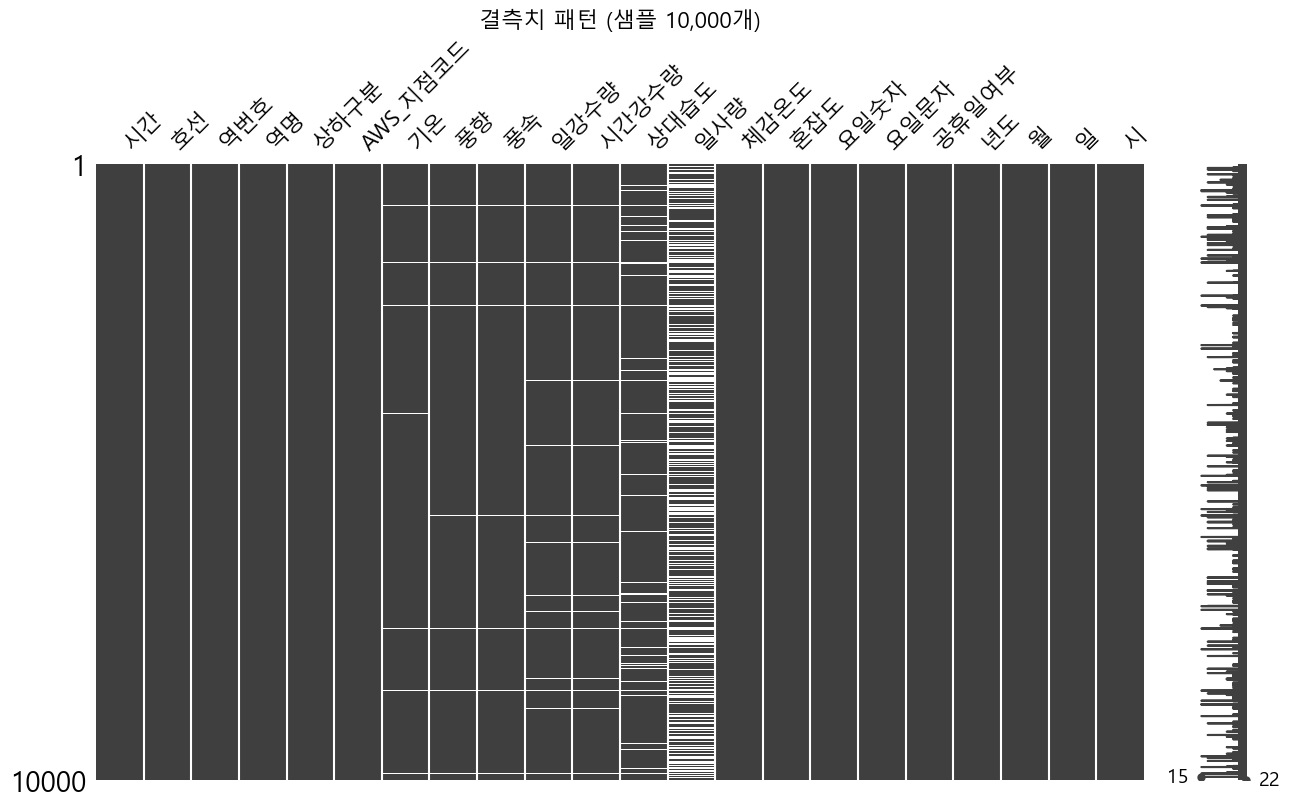

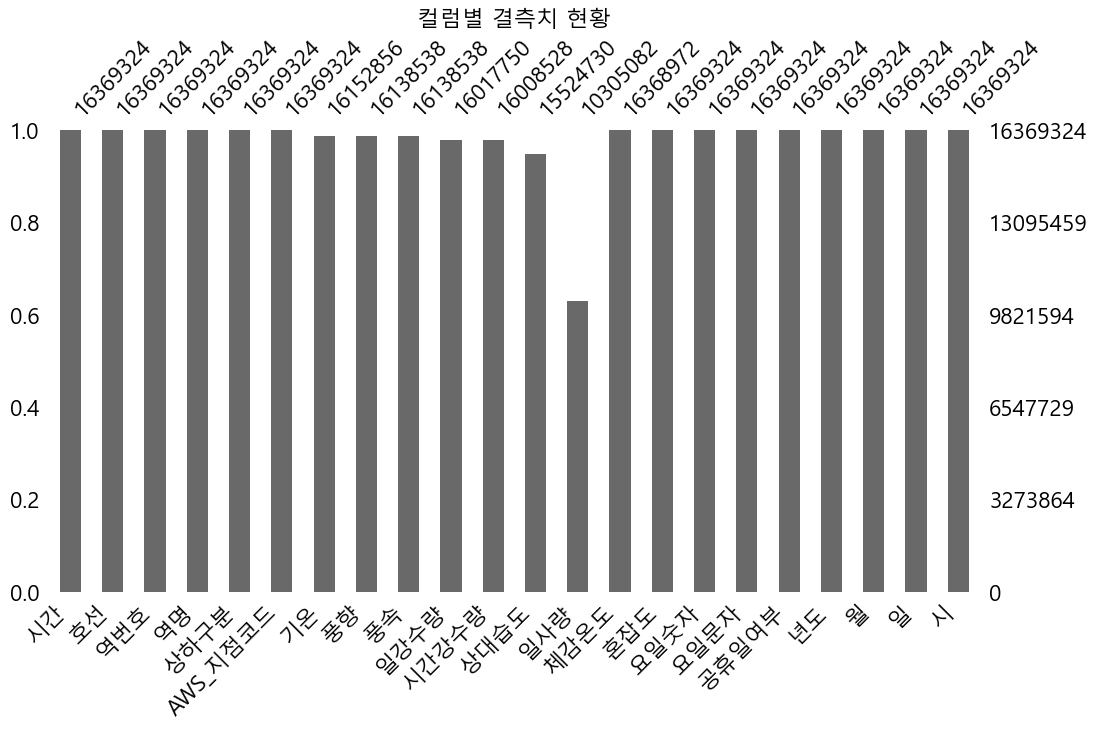

In [24]:
# Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî (missingno ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©)
plt.figure(figsize=(15, 8))
msno.matrix(df.sample(10000), figsize=(15, 8))
plt.title('Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ (ÏÉòÌîå 10,000Í∞ú)', fontsize=16)
plt.show()

# Í≤∞Ï∏°Ïπò Î∞î Ï∞®Ìä∏
plt.figure(figsize=(12, 6))
msno.bar(df, figsize=(12, 6))
plt.title('Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò ÌòÑÌô©', fontsize=16)
plt.show()


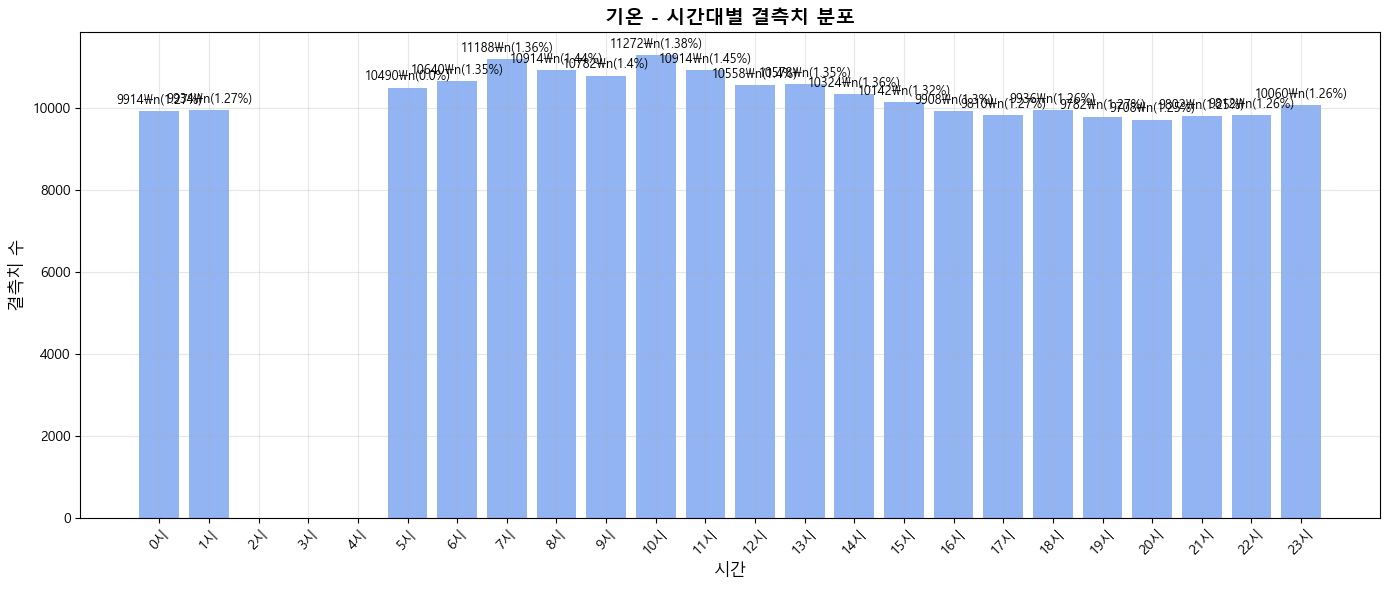

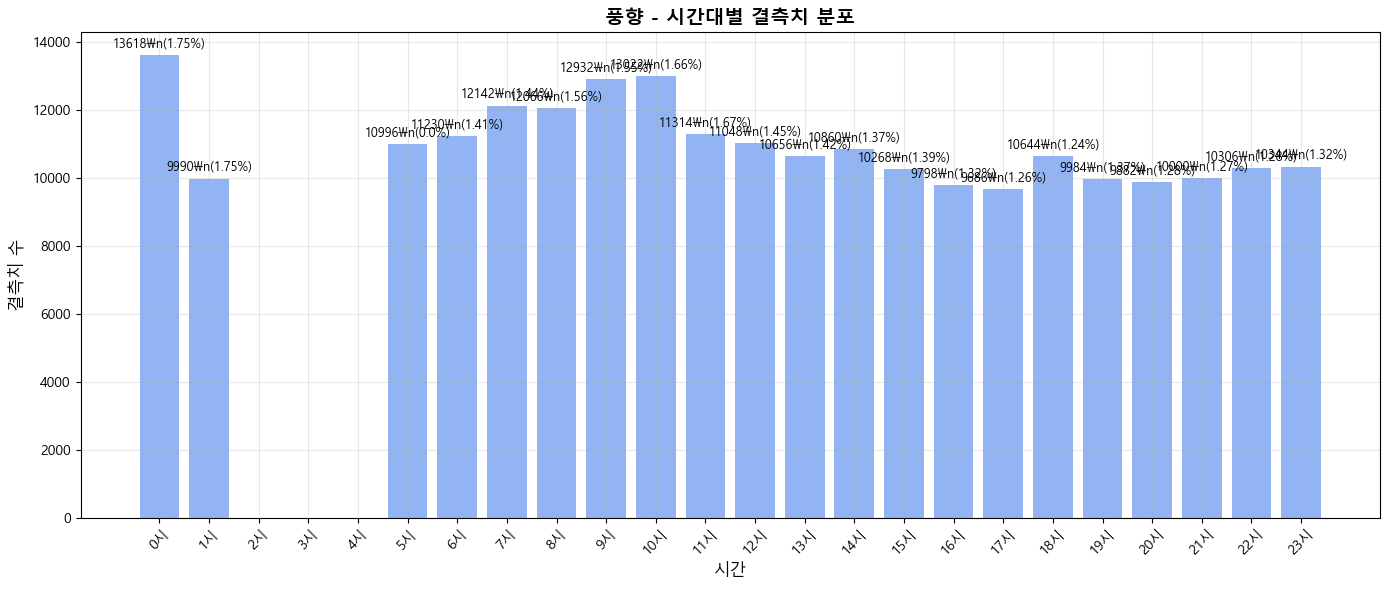

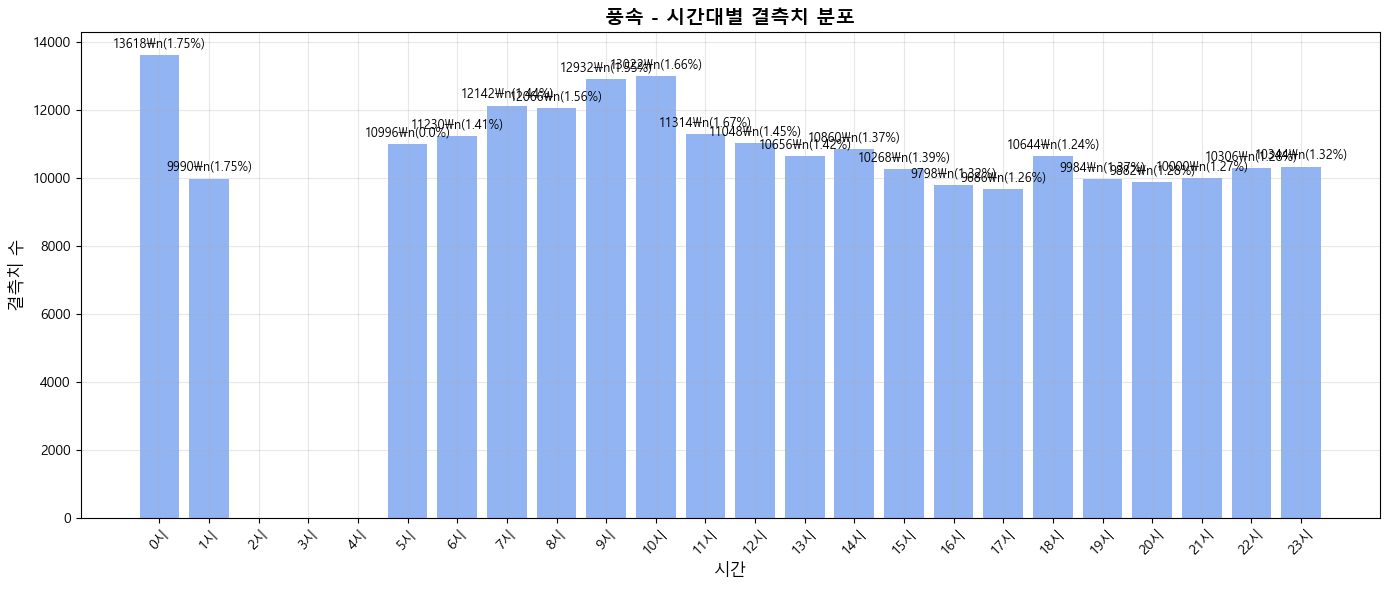

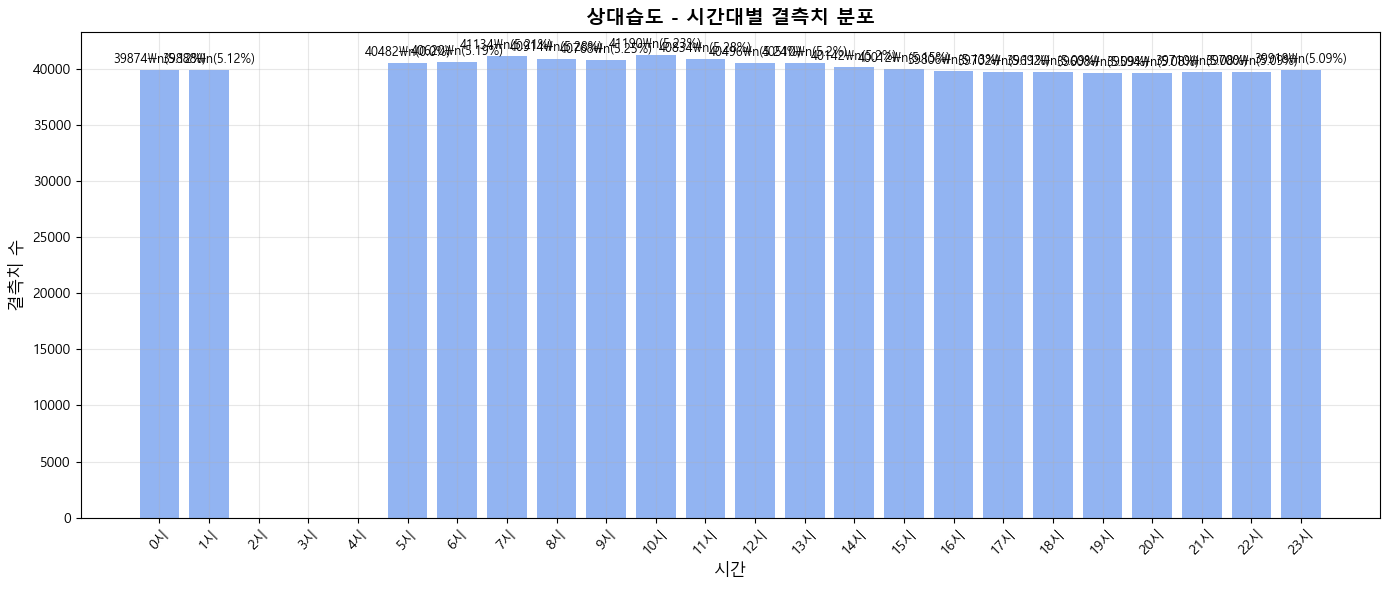

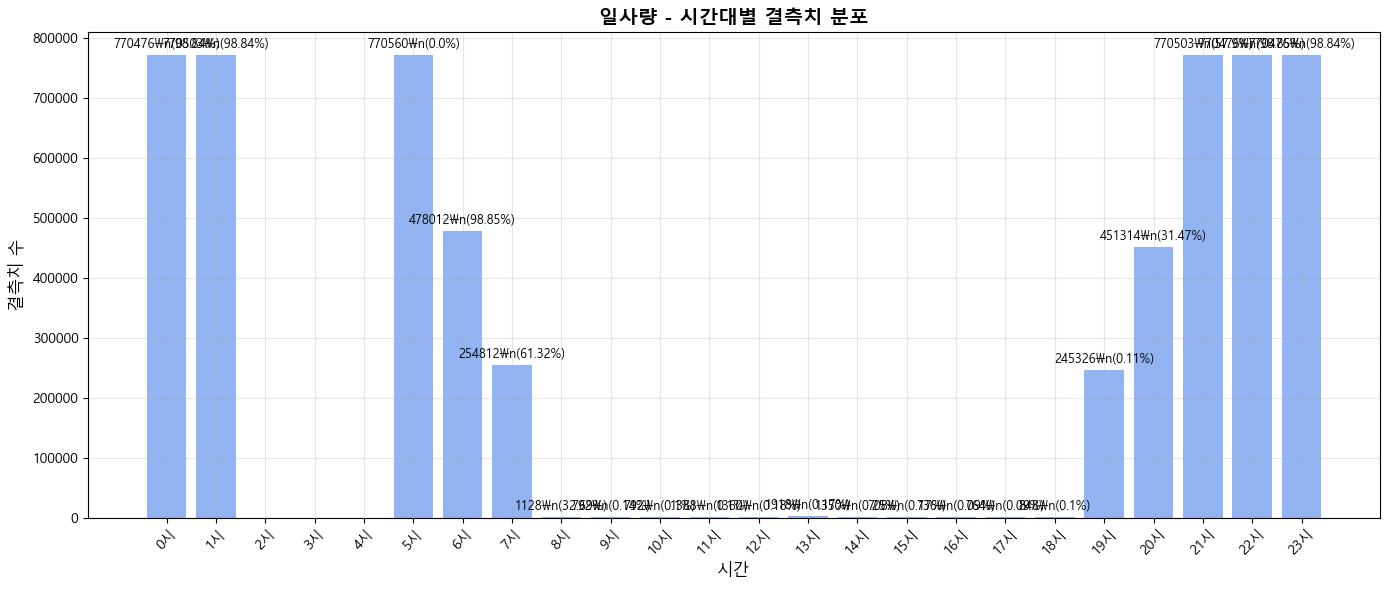

In [25]:
# ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Î∂ÑÏÑù Ìï®Ïàò
def plot_missing_by_hour(df, column):
    """ÌäπÏ†ï Ïª¨ÎüºÏùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°ÏπòÎ•º ÏãúÍ∞ÅÌôî"""
    hourly_total = df['Ïãú'].value_counts().sort_index()
    hourly_missing = df[df[column].isnull()]['Ïãú'].value_counts().sort_index()
    hourly_missing_rate = (hourly_missing / hourly_total * 100).round(2)
    
    plt.figure(figsize=(14, 6))
    bars = plt.bar(hourly_missing.index, hourly_missing.values, color='cornflowerblue', alpha=0.7)
    plt.title(f'{column} - ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Î∂ÑÌè¨', fontsize=14, fontweight='bold')
    plt.xlabel('ÏãúÍ∞Ñ', fontsize=12)
    plt.ylabel('Í≤∞Ï∏°Ïπò Ïàò', fontsize=12)
    plt.xticks(range(24), [f'{i}Ïãú' for i in range(24)], rotation=45)
    plt.grid(True, alpha=0.3)
    
    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for bar in bars:
        if bar.get_height() > 0:
            hour = int(bar.get_x())
            count = int(bar.get_height())
            rate = hourly_missing_rate.get(hour, 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hourly_missing) * 0.01,
                    f'{count}\\n({rate}%)', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Ï£ºÏöî Í∏∞ÏÉÅ Î≥ÄÏàòÎì§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤∞Ï∏°Ïπò Î∂ÑÏÑù
weather_columns = ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ']

for col in weather_columns:
    if df[col].isnull().sum() > 0:
        plot_missing_by_hour(df, col)


In [ ]:
# Í∞Å Ïó≠Î≥ÑÎ°ú ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Ïó¨Î∂Ä Î∂ÑÏÑù
print("=== Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Ïó¨Î∂Ä Î∂ÑÏÑù ===")

# Í≥†Ïú† Ïó≠ Ï†ïÎ≥¥ Ï∂îÏ∂ú
unique_stations = df[['Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ']].drop_duplicates()
print(f"Ï†ÑÏ≤¥ Í≥†Ïú† Ïó≠(Î∞©Ìñ• Ìè¨Ìï®): {len(unique_stations)}Í∞ú")

# Í∞Å Ïó≠Î≥ÑÎ°ú ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Í∞úÏàò ÌôïÏù∏
station_hour_data = df.groupby(['Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ', 'Ïãú']).size().reset_index(name='Îç∞Ïù¥ÌÑ∞Ïàò')

# Î™®Îì† Ïó≠Í≥º Î™®Îì† ÏãúÍ∞ÑÎåÄÏùò Ï°∞Ìï© ÏÉùÏÑ± (Í∏∞ÎåÄÍ∞í)
all_hours = range(24)
all_combinations = []
for _, station in unique_stations.iterrows():
    for hour in all_hours:
        all_combinations.append({
            'Ìò∏ÏÑ†': station['Ìò∏ÏÑ†'],
            'Ïó≠Î™Ö': station['Ïó≠Î™Ö'], 
            'ÏÉÅÌïòÍµ¨Î∂Ñ': station['ÏÉÅÌïòÍµ¨Î∂Ñ'],
            'Ïãú': hour
        })

expected_combinations = pd.DataFrame(all_combinations)

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÎåÄ Ï°∞Ìï©ÏùÑ Î≥ëÌï©ÌïòÏó¨ ÎàÑÎùΩÎêú ÏãúÍ∞ÑÎåÄ Ï∞æÍ∏∞
merged = expected_combinations.merge(station_hour_data, 
                                   on=['Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ', 'Ïãú'], 
                                   how='left')
merged['Îç∞Ïù¥ÌÑ∞Ïàò'] = merged['Îç∞Ïù¥ÌÑ∞Ïàò'].fillna(0)
merged['Îç∞Ïù¥ÌÑ∞Ï°¥Ïû¨'] = (merged['Îç∞Ïù¥ÌÑ∞Ïàò'] > 0).astype(int)

print(f"\nÏ†ÑÏ≤¥ Í∏∞ÎåÄ Ï°∞Ìï© Ïàò: {len(expected_combinations)}")
print(f"Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÎäî Ï°∞Ìï© Ïàò: {len(station_hour_data)}")
print(f"Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Ï°∞Ìï© Ïàò: {len(expected_combinations) - len(station_hour_data)}")

# Ïó≠Î≥ÑÎ°ú ÎàÑÎùΩÎêú ÏãúÍ∞ÑÎåÄ Ïàò Í≥ÑÏÇ∞
missing_by_station = merged[merged['Îç∞Ïù¥ÌÑ∞Ï°¥Ïû¨'] == 0].groupby(['Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ']).size().reset_index(name='ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò')
missing_by_station['ÎàÑÎùΩÎπÑÏú®(%)'] = (missing_by_station['ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò'] / 24 * 100).round(2)

print(f"\n=== ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩÏù¥ Ïã¨Ìïú Ïó≠ (ÏÉÅÏúÑ 10Í∞ú) ===")
print(missing_by_station.sort_values('ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò', ascending=False).head(10))


=== Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Ïó¨Î∂Ä Î∂ÑÏÑù ===


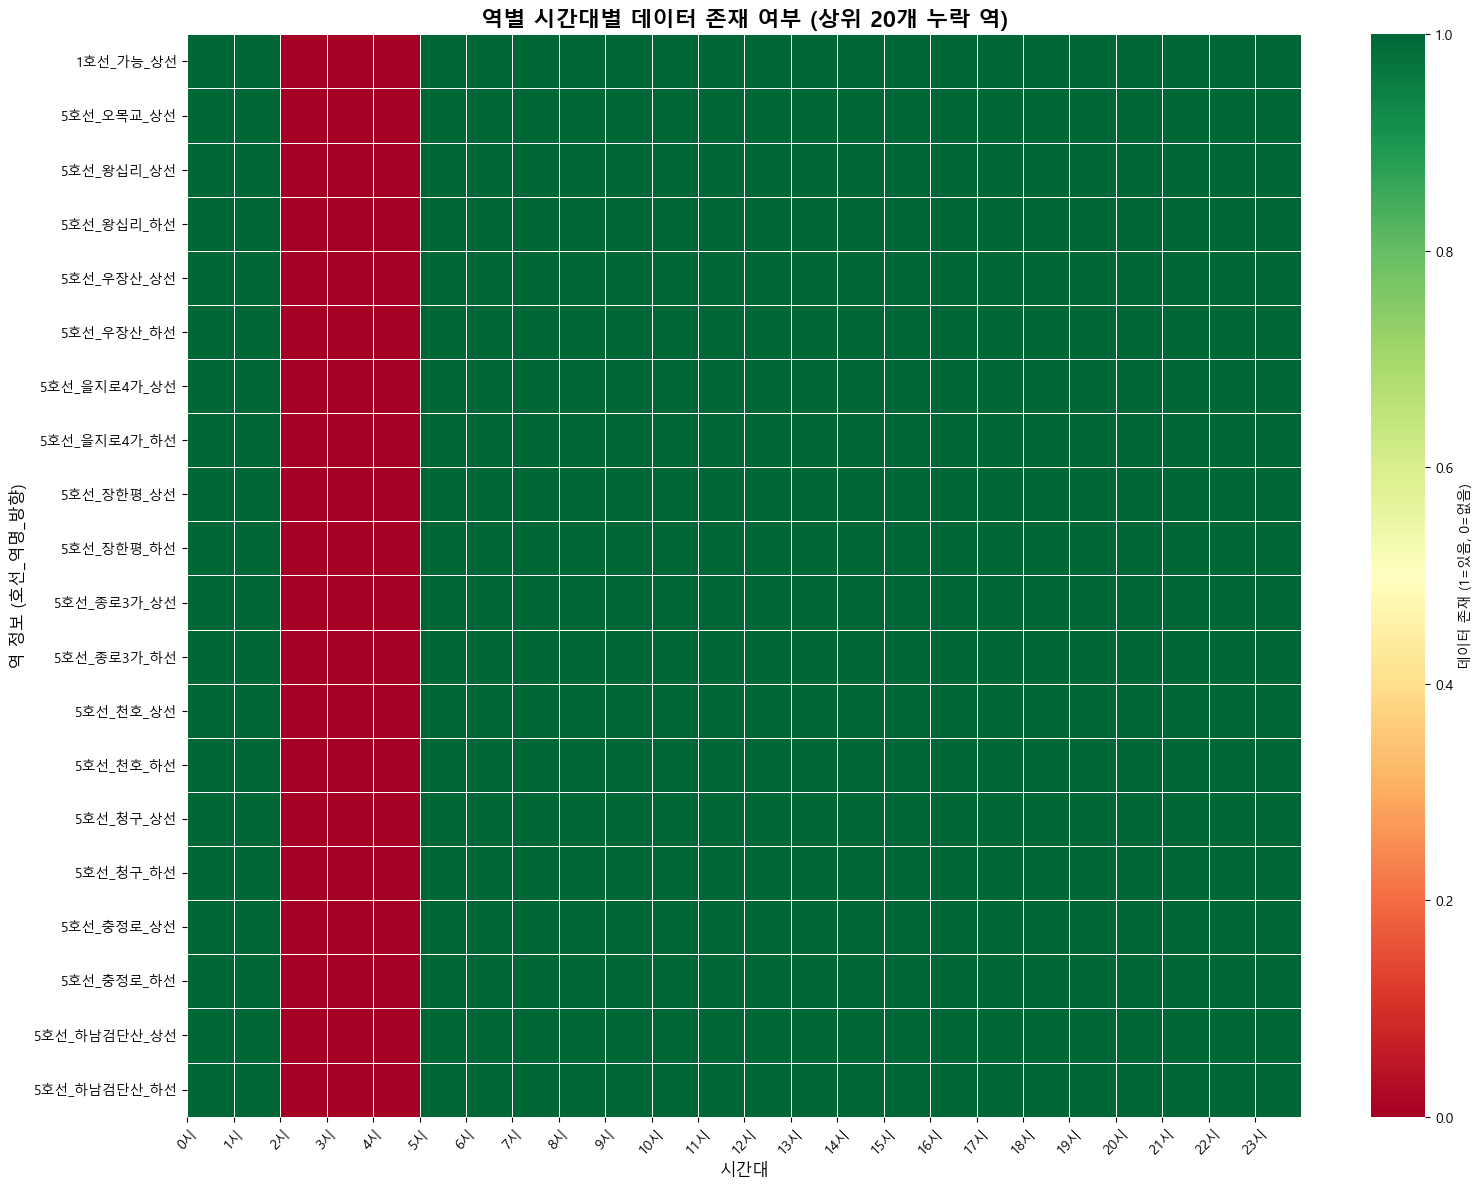

In [9]:
# Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Ïó¨Î∂Ä ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
# Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏúºÎØÄÎ°ú ÏÉÅÏúÑ 20Í∞ú ÎàÑÎùΩ Ïó≠Îßå ÏãúÍ∞ÅÌôî
top_missing_stations = missing_by_station.sort_values('ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò', ascending=False).head(20)

# ÌûàÌä∏ÎßµÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
heatmap_data = []
for _, station in top_missing_stations.iterrows():
    station_data = merged[
        (merged['Ìò∏ÏÑ†'] == station['Ìò∏ÏÑ†']) & 
        (merged['Ïó≠Î™Ö'] == station['Ïó≠Î™Ö']) & 
        (merged['ÏÉÅÌïòÍµ¨Î∂Ñ'] == station['ÏÉÅÌïòÍµ¨Î∂Ñ'])
    ].copy()
    station_data['Ïó≠_Ï†ïÎ≥¥'] = f"{station['Ìò∏ÏÑ†']}Ìò∏ÏÑ†_{station['Ïó≠Î™Ö']}_{station['ÏÉÅÌïòÍµ¨Î∂Ñ']}"
    heatmap_data.append(station_data)

if heatmap_data:
    heatmap_df = pd.concat(heatmap_data, ignore_index=True)
    
    # ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Ïó≠ x ÏãúÍ∞ÑÎåÄ)
    pivot_table = heatmap_df.pivot_table(
        index='Ïó≠_Ï†ïÎ≥¥', 
        columns='Ïãú', 
        values='Îç∞Ïù¥ÌÑ∞Ï°¥Ïû¨', 
        fill_value=0
    )
    
    # ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
    plt.figure(figsize=(16, 12))
    sns.heatmap(pivot_table, 
                cmap='RdYlGn', 
                cbar_kws={'label': 'Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ (1=ÏûàÏùå, 0=ÏóÜÏùå)'},
                linewidths=0.5,
                annot=False)
    plt.title('Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨ Ïó¨Î∂Ä (ÏÉÅÏúÑ 20Í∞ú ÎàÑÎùΩ Ïó≠)', fontsize=16, fontweight='bold')
    plt.xlabel('ÏãúÍ∞ÑÎåÄ', fontsize=12)
    plt.ylabel('Ïó≠ Ï†ïÎ≥¥ (Ìò∏ÏÑ†_Ïó≠Î™Ö_Î∞©Ìñ•)', fontsize=12)
    plt.xticks(range(24), [f'{i}Ïãú' for i in range(24)], rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
else:
    print("ÌûàÌä∏ÎßµÏùÑ Í∑∏Î¶¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")


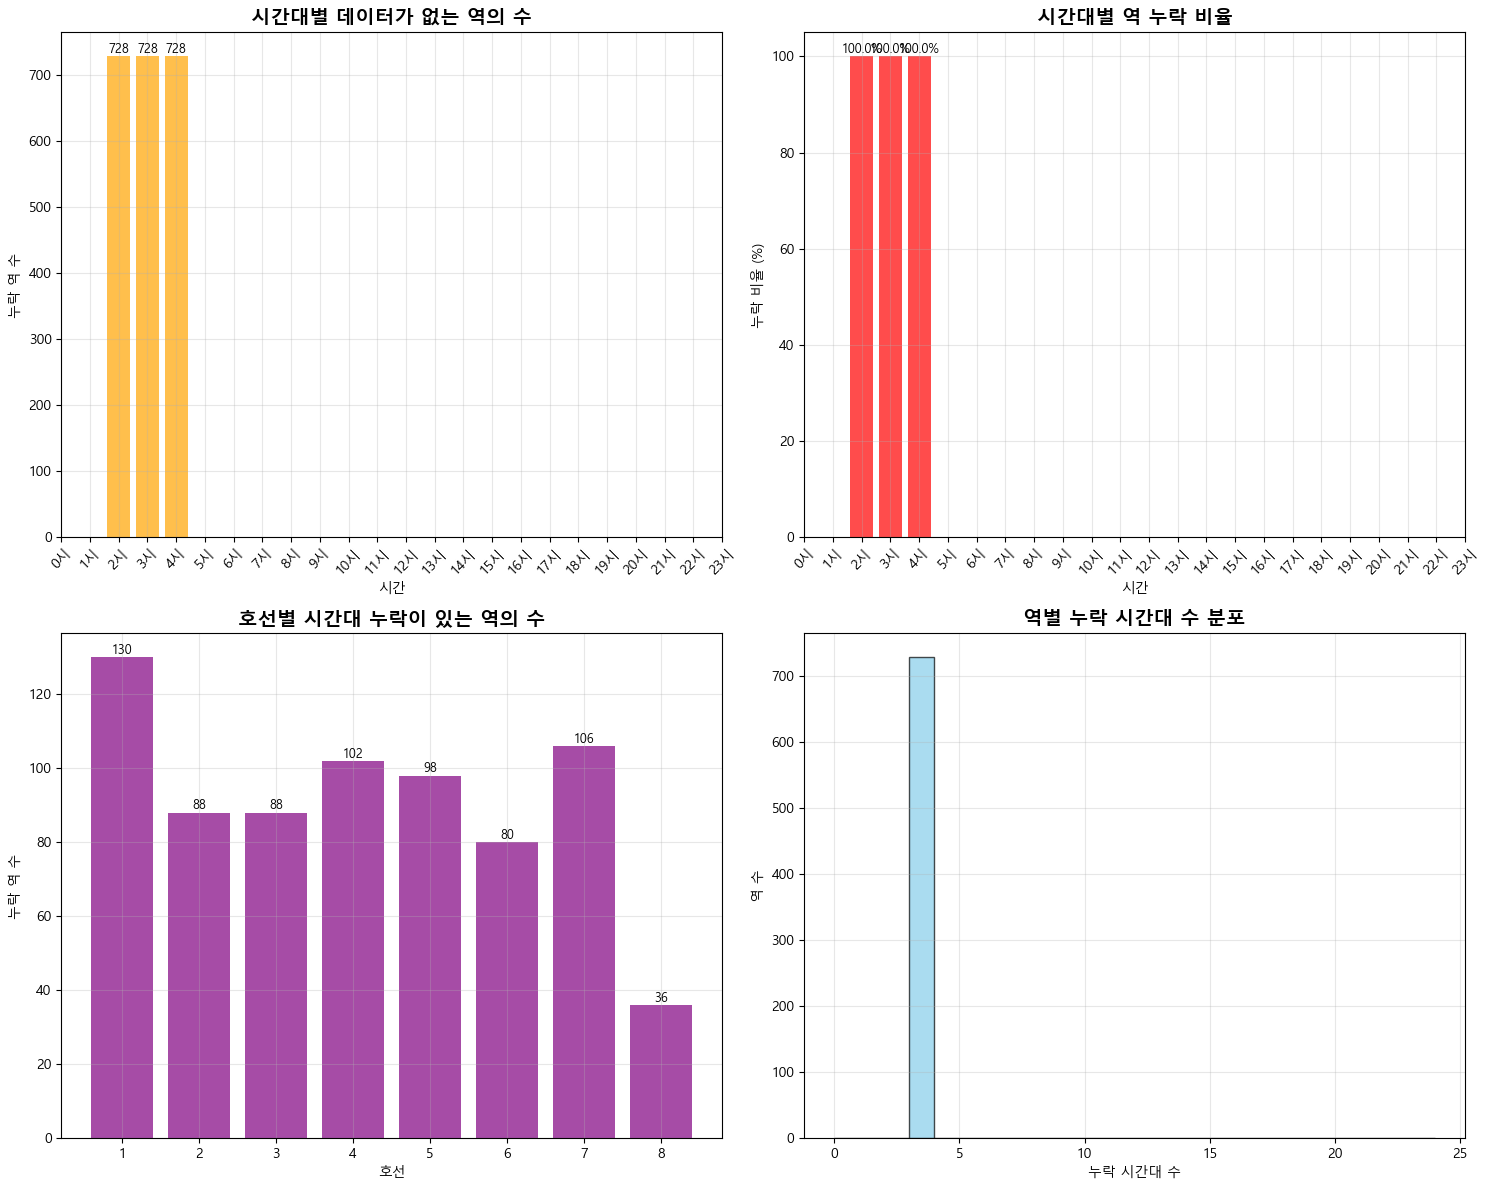


=== ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ ÏöîÏïΩ ===
ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏãúÍ∞ÑÎåÄÎãπ 728.0Í∞ú Ïó≠ÏóêÏÑú Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ
Í∞ÄÏû• ÎßéÏù¥ ÎàÑÎùΩÎêòÎäî ÏãúÍ∞ÑÎåÄ: 2Ïãú (728Í∞ú Ïó≠)
Ï†ÑÏ≤¥ Ïó≠ Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÏùò ÏãúÍ∞ÑÎåÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎàÑÎùΩÎêú Ïó≠: 728Í∞ú
Î™®Îì† ÏãúÍ∞ÑÎåÄÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏôÑÏ†ÑÌïú Ïó≠: 0Í∞ú


In [10]:
# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Ïó≠Ïùò Ïàò Î∂ÑÏÑù
missing_by_hour = merged[merged['Îç∞Ïù¥ÌÑ∞Ï°¥Ïû¨'] == 0].groupby('Ïãú').size().reset_index(name='ÎàÑÎùΩÏó≠Ïàò')
total_stations = len(unique_stations)
missing_by_hour['ÎàÑÎùΩÎπÑÏú®(%)'] = (missing_by_hour['ÎàÑÎùΩÏó≠Ïàò'] / total_stations * 100).round(2)

# ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÎùΩ Ïó≠ Ïàò
bars1 = axes[0, 0].bar(missing_by_hour['Ïãú'], missing_by_hour['ÎàÑÎùΩÏó≠Ïàò'], color='orange', alpha=0.7)
axes[0, 0].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Ïó≠Ïùò Ïàò', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('ÏãúÍ∞Ñ')
axes[0, 0].set_ylabel('ÎàÑÎùΩ Ïó≠ Ïàò')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(24))
axes[0, 0].set_xticklabels([f'{i}Ïãú' for i in range(24)], rotation=45)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÎùΩ ÎπÑÏú®
bars2 = axes[0, 1].bar(missing_by_hour['Ïãú'], missing_by_hour['ÎàÑÎùΩÎπÑÏú®(%)'], color='red', alpha=0.7)
axes[0, 1].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Ïó≠ ÎàÑÎùΩ ÎπÑÏú®', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('ÏãúÍ∞Ñ')
axes[0, 1].set_ylabel('ÎàÑÎùΩ ÎπÑÏú® (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(24))
axes[0, 1].set_xticklabels([f'{i}Ïãú' for i in range(24)], rotation=45)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# 3. Ìò∏ÏÑ†Î≥Ñ ÎàÑÎùΩ Ïó≠ Ïàò
missing_by_line = missing_by_station.groupby('Ìò∏ÏÑ†')['ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò'].agg(['count', 'mean']).reset_index()
missing_by_line.columns = ['Ìò∏ÏÑ†', 'ÎàÑÎùΩÏó≠Ïàò', 'ÌèâÍ∑†ÎàÑÎùΩÏãúÍ∞ÑÎåÄ']
bars3 = axes[1, 0].bar(missing_by_line['Ìò∏ÏÑ†'].astype(str), missing_by_line['ÎàÑÎùΩÏó≠Ïàò'], color='purple', alpha=0.7)
axes[1, 0].set_title('Ìò∏ÏÑ†Î≥Ñ ÏãúÍ∞ÑÎåÄ ÎàÑÎùΩÏù¥ ÏûàÎäî Ïó≠Ïùò Ïàò', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Ìò∏ÏÑ†')
axes[1, 0].set_ylabel('ÎàÑÎùΩ Ïó≠ Ïàò')
axes[1, 0].grid(True, alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars3:
    height = bar.get_height()
    if height > 0:
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 4. ÎàÑÎùΩ ÏãúÍ∞ÑÎåÄ Ïàò Î∂ÑÌè¨
axes[1, 1].hist(missing_by_station['ÎàÑÎùΩÏãúÍ∞ÑÎåÄÏàò'], bins=range(0, 25), color='skyblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Ïó≠Î≥Ñ ÎàÑÎùΩ ÏãúÍ∞ÑÎåÄ Ïàò Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('ÎàÑÎùΩ ÏãúÍ∞ÑÎåÄ Ïàò')
axes[1, 1].set_ylabel('Ïó≠ Ïàò')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÏöîÏïΩ ÌÜµÍ≥Ñ
print(f"\n=== ÏãúÍ∞ÑÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ ÏöîÏïΩ ===")
print(f"ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏãúÍ∞ÑÎåÄÎãπ {missing_by_hour['ÎàÑÎùΩÏó≠Ïàò'].mean():.1f}Í∞ú Ïó≠ÏóêÏÑú Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ")
print(f"Í∞ÄÏû• ÎßéÏù¥ ÎàÑÎùΩÎêòÎäî ÏãúÍ∞ÑÎåÄ: {missing_by_hour.loc[missing_by_hour['ÎàÑÎùΩÏó≠Ïàò'].idxmax(), 'Ïãú']}Ïãú ({missing_by_hour['ÎàÑÎùΩÏó≠Ïàò'].max()}Í∞ú Ïó≠)")
print(f"Ï†ÑÏ≤¥ Ïó≠ Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÏùò ÏãúÍ∞ÑÎåÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎàÑÎùΩÎêú Ïó≠: {len(missing_by_station)}Í∞ú")
print(f"Î™®Îì† ÏãúÍ∞ÑÎåÄÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏôÑÏ†ÑÌïú Ïó≠: {len(unique_stations) - len(missing_by_station)}Í∞ú")


In [ ]:
# Ï†ÑÏ≤¥ ÏãúÍ∞Ñ Î≤îÏúÑ ÏÉùÏÑ± (2021~2023, Îß§ÏãúÍ∞Ñ)
full_time_range = pd.date_range(start='2021-01-01 00:00', end='2023-12-31 23:00', freq='H')
total_expected_records = len(full_time_range)

print(f"ÏòàÏÉÅ Ï¥ù ÏãúÍ∞Ñ Ïàò: {total_expected_records}")

# Í∞Å Ïó≠Î≥Ñ Í≥†Ïú† ÏãúÍ∞Ñ Ïàò Í≥ÑÏÇ∞
station_time_counts = df.groupby(['Ìò∏ÏÑ†', 'Ïó≠Î™Ö', 'ÏÉÅÌïòÍµ¨Î∂Ñ'])['ÏãúÍ∞Ñ'].nunique().reset_index()
station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'] = (station_time_counts['ÏãúÍ∞Ñ'] / total_expected_records * 100).round(2)
station_time_counts['ÎàÑÎùΩ_ÏãúÍ∞ÑÏàò'] = total_expected_records - station_time_counts['ÏãúÍ∞Ñ']

print("\n=== Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ (ÏÉÅÏúÑ 10Í∞ú) ===")
print(station_time_counts.sort_values('ÏôÑÏÑ±ÎèÑ(%)', ascending=False).head(10))

print("\n=== Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ (ÌïòÏúÑ 10Í∞ú) ===")
print(station_time_counts.sort_values('ÏôÑÏÑ±ÎèÑ(%)', ascending=True).head(10))


ÏòàÏÉÅ Ï¥ù ÏãúÍ∞Ñ Ïàò: 26280

=== Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ (ÏÉÅÏúÑ 10Í∞ú) ===
     Ìò∏ÏÑ†     Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ     ÏãúÍ∞Ñ  ÏôÑÏÑ±ÎèÑ(%)  ÎàÑÎùΩ_ÏãúÍ∞ÑÏàò
0     1     Í∞ÄÎä•   ÏÉÅÏÑ†  22680    86.3    3600
495   5    Ï∂©Ï†ïÎ°ú   ÌïòÏÑ†  22680    86.3    3600
475   5  ÏòÅÎì±Ìè¨Íµ¨Ï≤≠   ÌïòÏÑ†  22680    86.3    3600
476   5  ÏòÅÎì±Ìè¨ÏãúÏû•   ÏÉÅÏÑ†  22680    86.3    3600
477   5  ÏòÅÎì±Ìè¨ÏãúÏû•   ÌïòÏÑ†  22680    86.3    3600
478   5    Ïò§Î™©Íµê   ÏÉÅÏÑ†  22680    86.3    3600
479   5    Ïò§Î™©Íµê   ÌïòÏÑ†  22680    86.3    3600
480   5    ÏôïÏã≠Î¶¨   ÏÉÅÏÑ†  22680    86.3    3600
481   5    ÏôïÏã≠Î¶¨   ÌïòÏÑ†  22679    86.3    3601
482   5    Ïö∞Ïû•ÏÇ∞   ÏÉÅÏÑ†  22680    86.3    3600

=== Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ (ÌïòÏúÑ 10Í∞ú) ===
     Ìò∏ÏÑ†     Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ     ÏãúÍ∞Ñ  ÏôÑÏÑ±ÎèÑ(%)  ÎàÑÎùΩ_ÏãúÍ∞ÑÏàò
102   1     Ï†ÑÍ≥°   ÏÉÅÏÑ†    336    1.28   25944
124   1     Ï≤≠ÏÇ∞   ÏÉÅÏÑ†    336    1.28   25944
85    1     Ïó∞Ï≤ú   ÌïòÏÑ†    336    1.28   25944
103   1     Ï†ÑÍ≥°

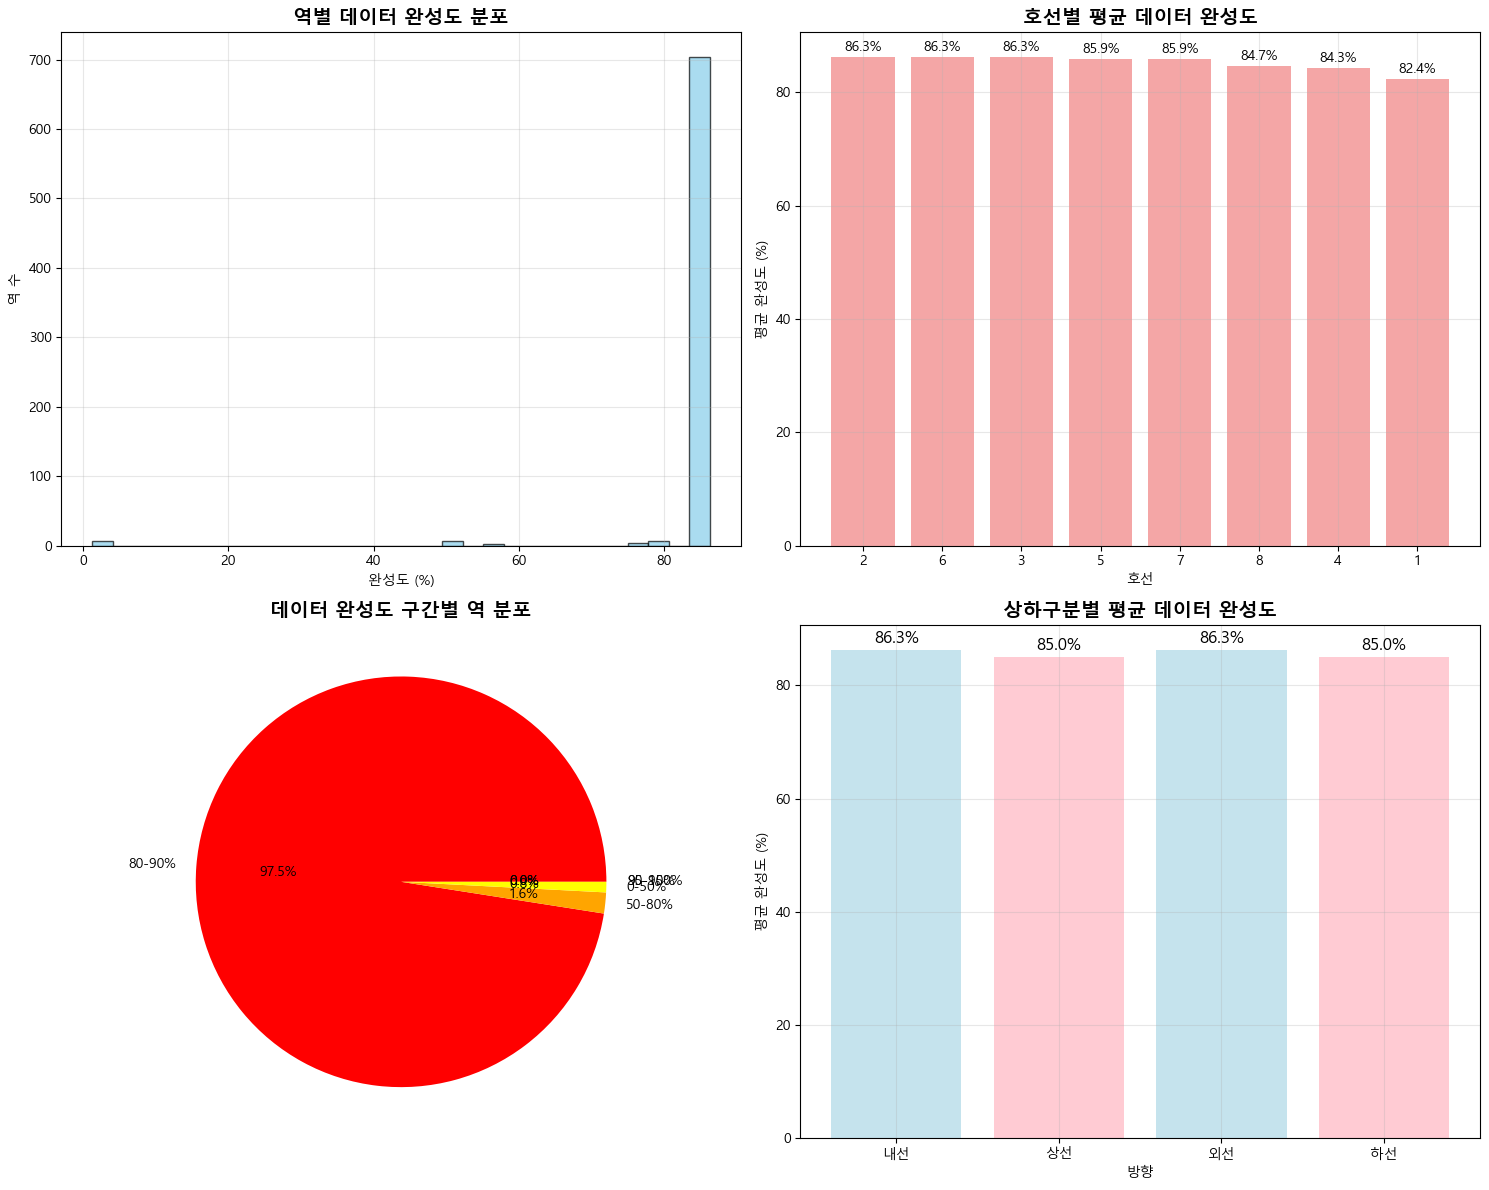

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ÏôÑÏÑ±ÎèÑ ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0, 0].hist(station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('ÏôÑÏÑ±ÎèÑ (%)')
axes[0, 0].set_ylabel('Ïó≠ Ïàò')
axes[0, 0].grid(True, alpha=0.3)

# 2. Ìò∏ÏÑ†Î≥Ñ ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ
line_completeness = station_time_counts.groupby('Ìò∏ÏÑ†')['ÏôÑÏÑ±ÎèÑ(%)'].mean().sort_values(ascending=False)
bars = axes[0, 1].bar(line_completeness.index.astype(str), line_completeness.values, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Ìò∏ÏÑ†Î≥Ñ ÌèâÍ∑† Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ìò∏ÏÑ†')
axes[0, 1].set_ylabel('ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ (%)')
axes[0, 1].grid(True, alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# 3. ÏôÑÏÑ±ÎèÑÎ≥Ñ Ïó≠ Í∞úÏàò
completeness_bins = pd.cut(station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'], bins=[0, 50, 80, 90, 95, 100], 
                          labels=['0-50%', '50-80%', '80-90%', '90-95%', '95-100%'])
completeness_counts = completeness_bins.value_counts()
axes[1, 0].pie(completeness_counts.values, labels=completeness_counts.index, autopct='%1.1f%%', 
               colors=['red', 'orange', 'yellow', 'lightgreen', 'green'])
axes[1, 0].set_title('Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Íµ¨Í∞ÑÎ≥Ñ Ïó≠ Î∂ÑÌè¨', fontsize=14, fontweight='bold')

# 4. ÏÉÅÌïòÍµ¨Î∂ÑÎ≥Ñ ÏôÑÏÑ±ÎèÑ
direction_completeness = station_time_counts.groupby('ÏÉÅÌïòÍµ¨Î∂Ñ')['ÏôÑÏÑ±ÎèÑ(%)'].mean()
bars = axes[1, 1].bar(direction_completeness.index, direction_completeness.values, 
                      color=['lightblue', 'lightpink'], alpha=0.7)
axes[1, 1].set_title('ÏÉÅÌïòÍµ¨Î∂ÑÎ≥Ñ ÌèâÍ∑† Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Î∞©Ìñ•')
axes[1, 1].set_ylabel('ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ (%)')
axes[1, 1].grid(True, alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


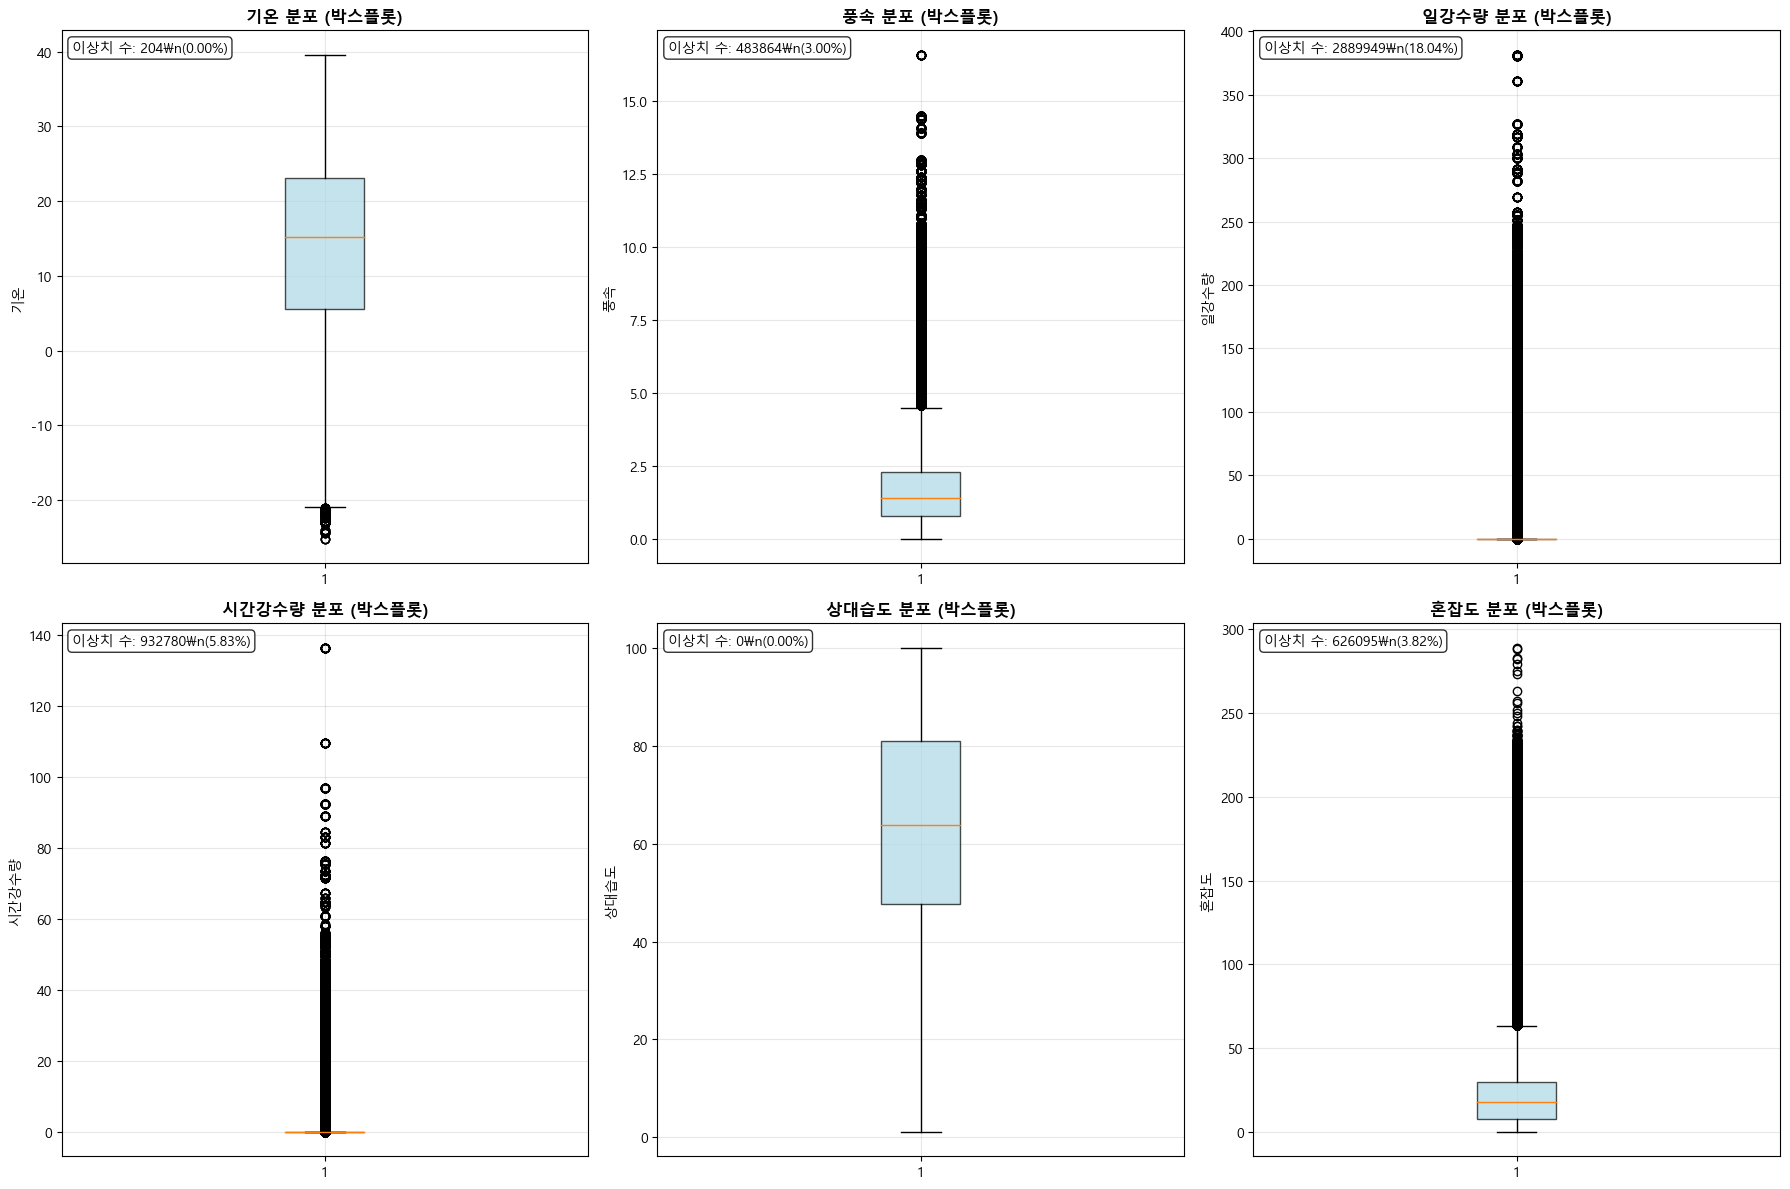

In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥ÏÉÅÏπò Î∂ÑÏÑù
numeric_columns = ['Í∏∞Ïò®', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÌòºÏû°ÎèÑ']

# Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    if col in df.columns:
        # Í≤∞Ï∏°Ïπò Ï†úÏô∏ÌïòÍ≥† Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
        data_no_nan = df[col].dropna()
        axes[i].boxplot(data_no_nan, patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[i].set_title(f'{col} Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)
        
        # Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ ÌëúÏãú
        q1 = data_no_nan.quantile(0.25)
        q3 = data_no_nan.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data_no_nan[(data_no_nan < lower_bound) | (data_no_nan > upper_bound)]
        
        axes[i].text(0.02, 0.98, f'Ïù¥ÏÉÅÏπò Ïàò: {len(outliers)}\\n({len(outliers)/len(data_no_nan)*100:.2f}%)', 
                    transform=axes[i].transAxes, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


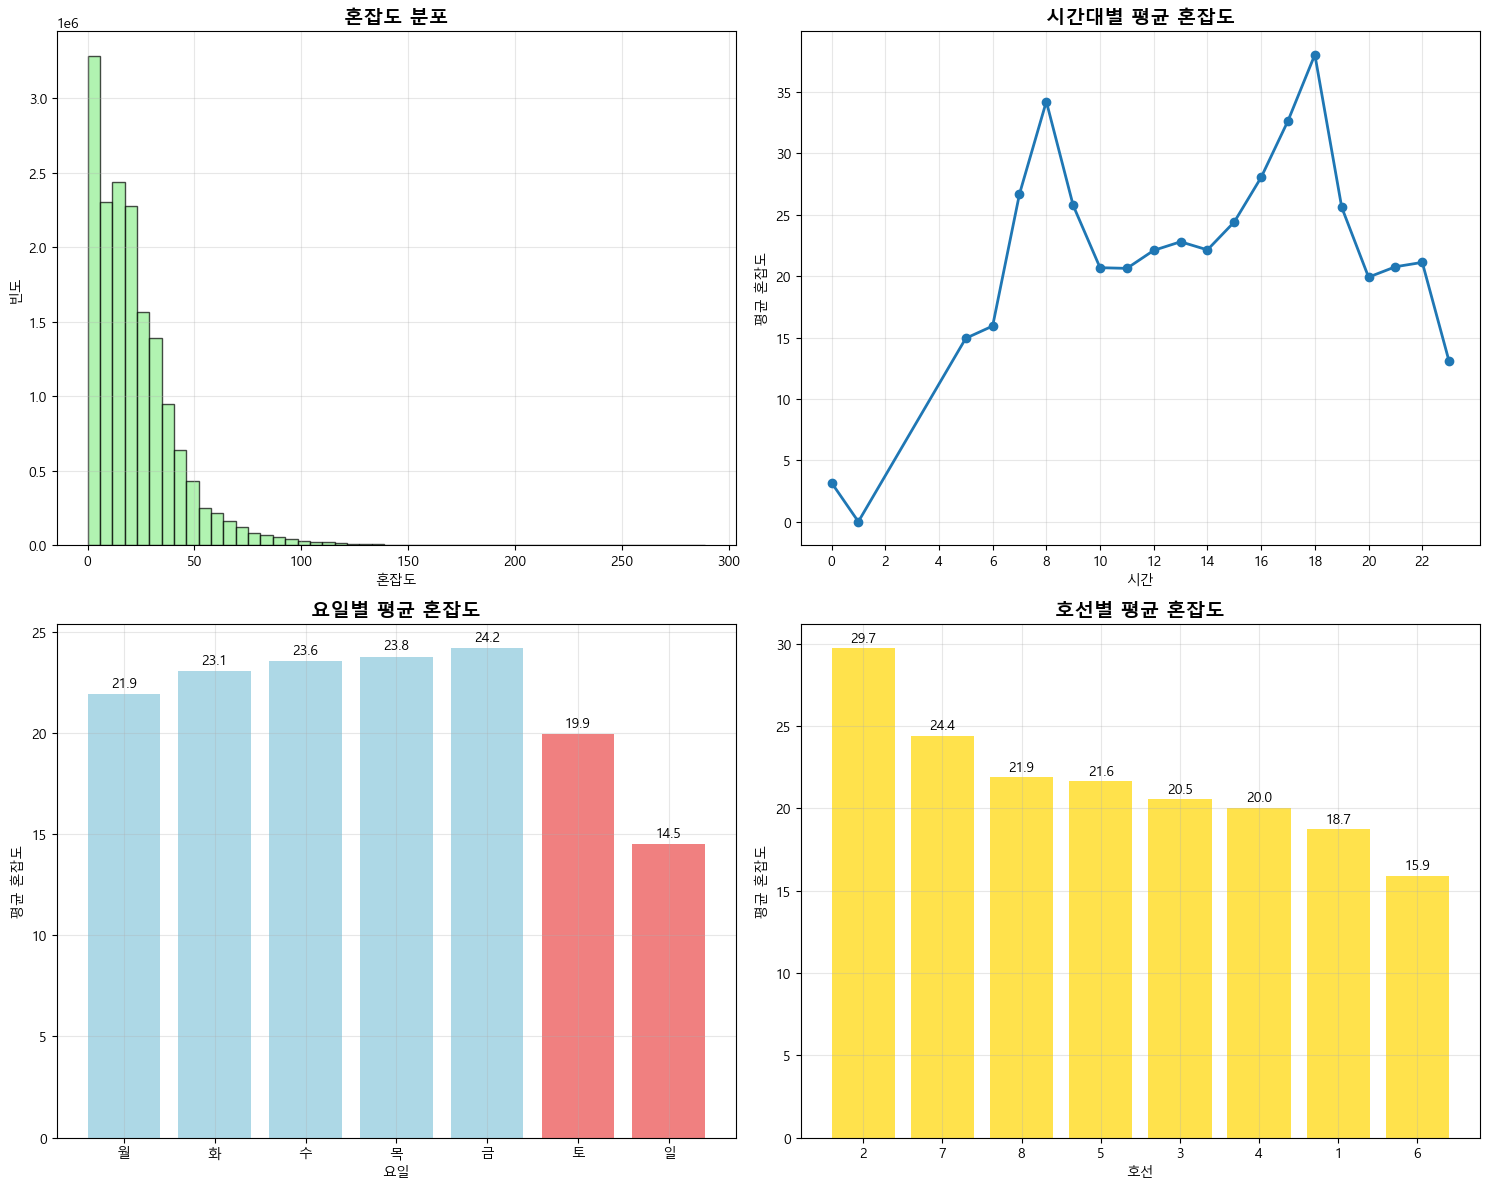

In [ ]:
# ÌòºÏû°ÎèÑ Î∂ÑÌè¨ ÏÉÅÏÑ∏ Î∂ÑÏÑù
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ÌòºÏû°ÎèÑ ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0, 0].hist(df['ÌòºÏû°ÎèÑ'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('ÌòºÏû°ÎèÑ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('ÌòºÏû°ÎèÑ')
axes[0, 0].set_ylabel('ÎπàÎèÑ')
axes[0, 0].grid(True, alpha=0.3)

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ
hourly_congestion = df.groupby('Ïãú')['ÌòºÏû°ÎèÑ'].mean()
axes[0, 1].plot(hourly_congestion.index, hourly_congestion.values, marker='o', linewidth=2, markersize=6)
axes[0, 1].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('ÏãúÍ∞Ñ')
axes[0, 1].set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# 3. ÏöîÏùºÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ
weekday_congestion = df.groupby('ÏöîÏùºÎ¨∏Ïûê')['ÌòºÏû°ÎèÑ'].mean()
weekday_order = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']
weekday_congestion = weekday_congestion.reindex(weekday_order)
bars = axes[1, 0].bar(weekday_congestion.index, weekday_congestion.values, 
                      color=['lightcoral' if day in ['ÌÜ†', 'Ïùº'] else 'lightblue' for day in weekday_order])
axes[1, 0].set_title('ÏöîÏùºÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('ÏöîÏùº')
axes[1, 0].set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
axes[1, 0].grid(True, alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# 4. Ìò∏ÏÑ†Î≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ
line_congestion = df.groupby('Ìò∏ÏÑ†')['ÌòºÏû°ÎèÑ'].mean().sort_values(ascending=False)
bars = axes[1, 1].bar(line_congestion.index.astype(str), line_congestion.values, color='gold', alpha=0.7)
axes[1, 1].set_title('Ìò∏ÏÑ†Î≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ìò∏ÏÑ†')
axes[1, 1].set_ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
axes[1, 1].grid(True, alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


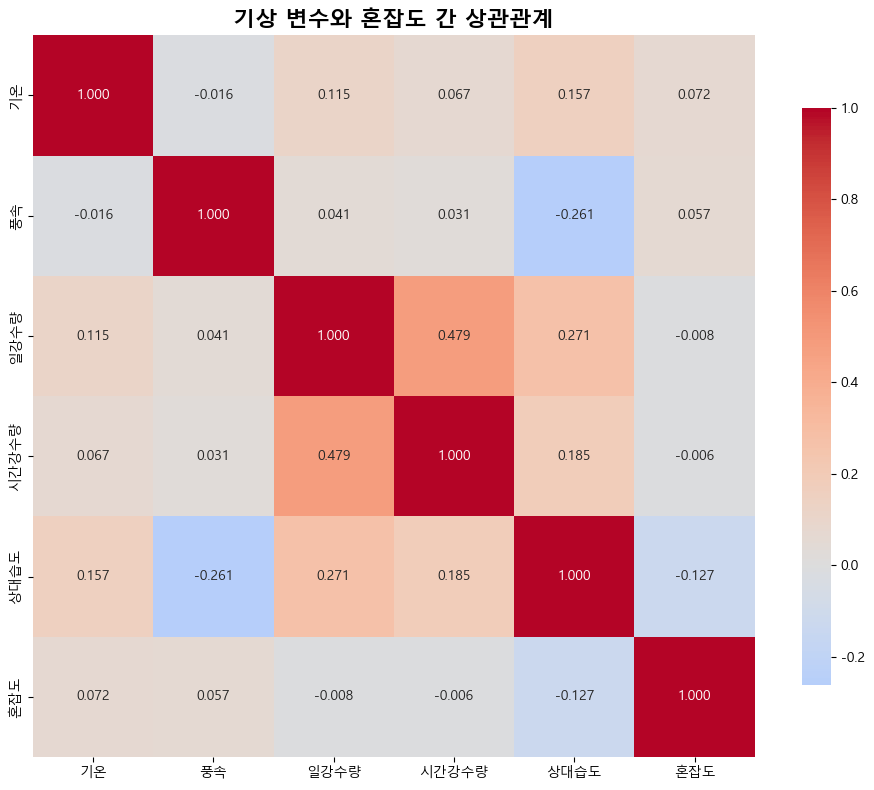


=== ÌòºÏû°ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä) ===
ÌòºÏû°ÎèÑ      1.000000
ÏÉÅÎåÄÏäµÎèÑ     0.127417
Í∏∞Ïò®       0.071683
ÌíçÏÜç       0.057138
ÏùºÍ∞ïÏàòÎüâ     0.008435
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ    0.006237
Name: ÌòºÏû°ÎèÑ, dtype: float64


In [ ]:
# Í∏∞ÏÉÅ Î≥ÄÏàòÏôÄ ÌòºÏû°ÎèÑ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation_columns = ['Í∏∞Ïò®', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÌòºÏû°ÎèÑ']
corr_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Í∏∞ÏÉÅ Î≥ÄÏàòÏôÄ ÌòºÏû°ÎèÑ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ÌòºÏû°ÎèÑÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§
congestion_corr = corr_matrix['ÌòºÏû°ÎèÑ'].abs().sort_values(ascending=False)
print("\n=== ÌòºÏû°ÎèÑÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä) ===")
print(congestion_corr)


Ï†ÑÏ≤¥ ÏòàÏÉÅ ÏãúÍ∞Ñ Ïàò: 26280
Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏãúÍ∞Ñ Ïàò: 22680
ÎàÑÎùΩÎêú ÏãúÍ∞Ñ Ïàò: 3600
Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨Ïú®: 86.30%


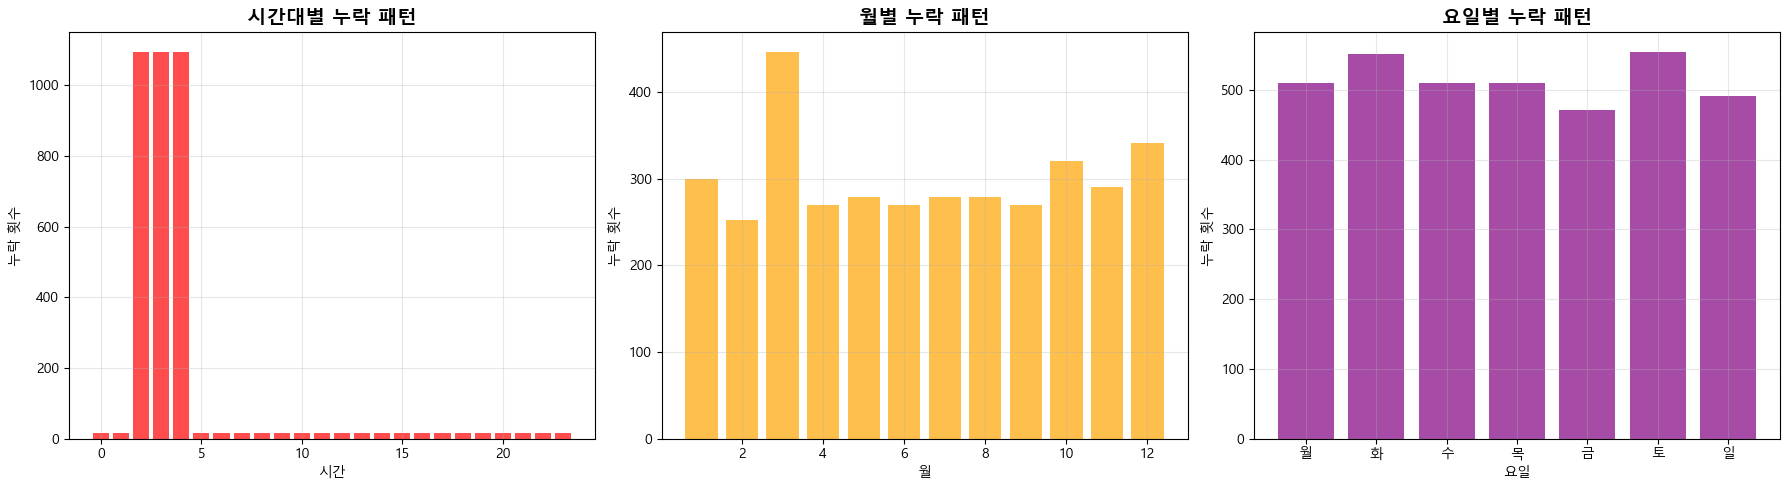


2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÏãúÍ∞Ñ Ïàò: 315
2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÎÇ†Ïßú Ïàò: 15

2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÎÇ†Ïßú (Ï≤òÏùå 10Í∞ú):
2022-01-22 (ÌÜ†) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-03 (Î™©) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-05 (ÌÜ†) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-06 (Ïùº) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-07 (Ïõî) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-08 (Ìôî) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-03-09 (Ïàò) - Í≥µÌú¥Ïùº: Ïòà
2022-03-10 (Î™©) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-10-01 (ÌÜ†) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§
2022-10-04 (Ìôî) - Í≥µÌú¥Ïùº: ÏïÑÎãàÏò§


In [ ]:
# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏãúÍ∞ÑÍ≥º ÎàÑÎùΩÎêú ÏãúÍ∞Ñ Î∂ÑÏÑù
actual_times = df['ÏãúÍ∞Ñ'].drop_duplicates().sort_values()
missing_times = full_time_range.difference(actual_times)

print(f"Ï†ÑÏ≤¥ ÏòàÏÉÅ ÏãúÍ∞Ñ Ïàò: {len(full_time_range)}")
print(f"Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏãúÍ∞Ñ Ïàò: {len(actual_times)}")
print(f"ÎàÑÎùΩÎêú ÏãúÍ∞Ñ Ïàò: {len(missing_times)}")
print(f"Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨Ïú®: {len(actual_times)/len(full_time_range)*100:.2f}%")

if len(missing_times) > 0:
    # ÎàÑÎùΩÎêú ÏãúÍ∞ÑÎì§Ïùò Ìå®ÌÑ¥ Î∂ÑÏÑù
    missing_df = pd.DataFrame({'ÏãúÍ∞Ñ': missing_times})
    missing_df['Ïãú'] = missing_df['ÏãúÍ∞Ñ'].dt.hour
    missing_df['Ïõî'] = missing_df['ÏãúÍ∞Ñ'].dt.month
    missing_df['ÏöîÏùº'] = missing_df['ÏãúÍ∞Ñ'].dt.weekday
    missing_df['ÏöîÏùºÎ¨∏Ïûê'] = missing_df['ÏöîÏùº'].apply(lambda x: weekday_map[x])
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥
    missing_hour = missing_df['Ïãú'].value_counts().sort_index()
    axes[0].bar(missing_hour.index, missing_hour.values, color='red', alpha=0.7)
    axes[0].set_title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('ÏãúÍ∞Ñ')
    axes[0].set_ylabel('ÎàÑÎùΩ ÌöüÏàò')
    axes[0].grid(True, alpha=0.3)
    
    # ÏõîÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥
    missing_month = missing_df['Ïõî'].value_counts().sort_index()
    axes[1].bar(missing_month.index, missing_month.values, color='orange', alpha=0.7)
    axes[1].set_title('ÏõîÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Ïõî')
    axes[1].set_ylabel('ÎàÑÎùΩ ÌöüÏàò')
    axes[1].grid(True, alpha=0.3)
    
    # ÏöîÏùºÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥
    missing_weekday = missing_df['ÏöîÏùºÎ¨∏Ïûê'].value_counts().reindex(weekday_map)
    axes[2].bar(missing_weekday.index, missing_weekday.values, color='purple', alpha=0.7)
    axes[2].set_title('ÏöîÏùºÎ≥Ñ ÎàÑÎùΩ Ìå®ÌÑ¥', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('ÏöîÏùº')
    axes[2].set_ylabel('ÎàÑÎùΩ ÌöüÏàò')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ÌäπÏ†ï ÏãúÍ∞ÑÎåÄ (2-4Ïãú) Ï†úÏô∏Ìïú ÎàÑÎùΩ ÏãúÍ∞Ñ Î∂ÑÏÑù
    filtered_missing = missing_times[~pd.Series(missing_times).dt.hour.isin([2, 3, 4])]
    print(f"\n2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÏãúÍ∞Ñ Ïàò: {len(filtered_missing)}")
    
    if len(filtered_missing) > 0:
        filtered_missing_dates = pd.to_datetime(filtered_missing).normalize().drop_duplicates()
        print(f"2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÎÇ†Ïßú Ïàò: {len(filtered_missing_dates)}")
        print("\n2-4Ïãú Ï†úÏô∏ ÎàÑÎùΩ ÎÇ†Ïßú (Ï≤òÏùå 10Í∞ú):")
        for date in sorted(filtered_missing_dates)[:10]:
            weekday = weekday_map[date.weekday()]
            is_holiday = 1 if date.date() in kr_holidays else 0
            print(f"{date.strftime('%Y-%m-%d')} ({weekday}) - Í≥µÌú¥Ïùº: {'Ïòà' if is_holiday else 'ÏïÑÎãàÏò§'}")


In [ ]:
# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏöîÏïΩ
print("="*50)
print("           Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù ÏöîÏïΩ")
print("="*50)

print(f"\nüìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌòÑÌô©:")
print(f"   - Ï¥ù Î†àÏΩîÎìú Ïàò: {len(df):,}")
print(f"   - Í∏∞Í∞Ñ: {df['ÏãúÍ∞Ñ'].min().strftime('%Y-%m-%d')} ~ {df['ÏãúÍ∞Ñ'].max().strftime('%Y-%m-%d')}")
print(f"   - Í≥†Ïú† Ïó≠ Ïàò: {df['Ïó≠Î™Ö'].nunique()}")
print(f"   - Ìò∏ÏÑ† Ïàò: {df['Ìò∏ÏÑ†'].nunique()}")

print(f"\n‚ö†Ô∏è  Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
for col in ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ']:
    if col in df.columns:
        missing_rate = df[col].isnull().sum() / len(df) * 100
        print(f"   - {col}: {missing_rate:.2f}%")

print(f"\nüöá Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ:")
completeness_stats = station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'].describe()
print(f"   - ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ: {completeness_stats['mean']:.2f}%")
print(f"   - ÏµúÏÜå ÏôÑÏÑ±ÎèÑ: {completeness_stats['min']:.2f}%")
print(f"   - ÏµúÎåÄ ÏôÑÏÑ±ÎèÑ: {completeness_stats['max']:.2f}%")
print(f"   - ÏôÑÏÑ±ÎèÑ 95% Ïù¥ÏÉÅ Ïó≠: {(station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'] >= 95).sum()}Í∞ú")
print(f"   - ÏôÑÏÑ±ÎèÑ 80% ÎØ∏Îßå Ïó≠: {(station_time_counts['ÏôÑÏÑ±ÎèÑ(%)'] < 80).sum()}Í∞ú")

print(f"\nüìà ÌòºÏû°ÎèÑ Î∂ÑÌè¨:")
congestion_stats = df['ÌòºÏû°ÎèÑ'].describe()
print(f"   - ÌèâÍ∑† ÌòºÏû°ÎèÑ: {congestion_stats['mean']:.2f}")
print(f"   - ÏµúÏÜåÍ∞í: {congestion_stats['min']:.0f}")
print(f"   - ÏµúÎåÄÍ∞í: {congestion_stats['max']:.0f}")
print(f"   - ÌëúÏ§ÄÌé∏Ï∞®: {congestion_stats['std']:.2f}")

print(f"\nüîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:")
print(f"   - ÏùºÏÇ¨Îüâ Í≤∞Ï∏°Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå (37% Ïù¥ÏÉÅ)")
print(f"   - 2-4Ïãú ÏãúÍ∞ÑÎåÄÏóê ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ")
print(f"   - Ìò∏ÏÑ†Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑÏóê Ï∞®Ïù¥ Ï°¥Ïû¨")
print(f"   - ÌèâÏùºÍ≥º Ï£ºÎßêÏùò ÌòºÏû°ÎèÑ Ìå®ÌÑ¥ Ï∞®Ïù¥ ÌôïÏù∏")

print(f"\nüí° Î™®Îç∏ÎßÅ Í∂åÏû•ÏÇ¨Ìï≠:")
print(f"   - Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ Î∞©Î≤ï Í≥†Î†§ (ÏãúÍ∞ÑÏ†Å Ïó∞ÏÜçÏÑ± ÌôúÏö©)")
print(f"   - ÏùºÏÇ¨ÎüâÏùÄ Í≤∞Ï∏°Î•†Ïù¥ ÎÜíÏïÑ Ï†úÏô∏ Í≤ÄÌÜ†")
print(f"   - ÏãúÍ∞ÑÎåÄ, ÏöîÏùº, Í≥µÌú¥Ïùº ÌîºÏ≤ò ÌôúÏö©")
print(f"   - Ïó≠Î≥Ñ ÌäπÏÑ±ÏùÑ Í≥†Î†§Ìïú Í∞úÎ≥Ñ Î™®Îç∏ÎßÅ Í≤ÄÌÜ†")

print("="*50)


           Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∂ÑÏÑù ÏöîÏïΩ

üìä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌòÑÌô©:
   - Ï¥ù Î†àÏΩîÎìú Ïàò: 16,369,324
   - Í∏∞Í∞Ñ: 2021-01-01 ~ 2023-12-31
   - Í≥†Ïú† Ïó≠ Ïàò: 324
   - Ìò∏ÏÑ† Ïàò: 8

‚ö†Ô∏è  Í≤∞Ï∏°Ïπò ÌòÑÌô©:
   - Í∏∞Ïò®: 1.32%
   - ÌíçÌñ•: 1.41%
   - ÌíçÏÜç: 1.41%
   - ÏÉÅÎåÄÏäµÎèÑ: 5.16%
   - ÏùºÏÇ¨Îüâ: 37.05%

üöá Ïó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ:
   - ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ: 85.13%
   - ÏµúÏÜå ÏôÑÏÑ±ÎèÑ: 1.28%
   - ÏµúÎåÄ ÏôÑÏÑ±ÎèÑ: 86.30%
   - ÏôÑÏÑ±ÎèÑ 95% Ïù¥ÏÉÅ Ïó≠: 0Í∞ú
   - ÏôÑÏÑ±ÎèÑ 80% ÎØ∏Îßå Ïó≠: 18Í∞ú

üìà ÌòºÏû°ÎèÑ Î∂ÑÌè¨:
   - ÌèâÍ∑† ÌòºÏû°ÎèÑ: 21.56
   - ÏµúÏÜåÍ∞í: 0
   - ÏµúÎåÄÍ∞í: 289
   - ÌëúÏ§ÄÌé∏Ï∞®: 19.39

üîç Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:
   - ÏùºÏÇ¨Îüâ Í≤∞Ï∏°Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå (37% Ïù¥ÏÉÅ)
   - 2-4Ïãú ÏãúÍ∞ÑÎåÄÏóê ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÎàÑÎùΩ
   - Ìò∏ÏÑ†Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑÏóê Ï∞®Ïù¥ Ï°¥Ïû¨
   - ÌèâÏùºÍ≥º Ï£ºÎßêÏùò ÌòºÏû°ÎèÑ Ìå®ÌÑ¥ Ï∞®Ïù¥ ÌôïÏù∏

üí° Î™®Îç∏ÎßÅ Í∂åÏû•ÏÇ¨Ìï≠:
   - Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ Î∞©Î≤ï Í≥†Î†§ (ÏãúÍ∞ÑÏ†Å Ïó∞ÏÜçÏÑ± ÌôúÏö©)
   - ÏùºÏÇ¨ÎüâÏùÄ Í≤∞Ï∏°Î•†Ïù¥

In [ ]:
# Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
output_path = 'Îç∞Ïù¥ÌÑ∞2/preprocessed_subway_data.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä '{output_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# Ïó≠Î≥Ñ ÏôÑÏÑ±ÎèÑ Ï†ïÎ≥¥ÎèÑ Ï†ÄÏû•
completeness_path = 'Îç∞Ïù¥ÌÑ∞2/station_completeness.csv'
station_time_counts.to_csv(completeness_path, index=False, encoding='utf-8-sig')
print(f"Ïó≠Î≥Ñ ÏôÑÏÑ±ÎèÑ Ï†ïÎ≥¥Í∞Ä '{completeness_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


KeyboardInterrupt: 